Loading data...
Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10708 entries, 0 to 10707
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Sl Geounit (Code)               10708 non-null  object
 1   Job Group code                  10708 non-null  object
 2   Job Type code                   10708 non-null  object
 3   Activity ID                     10708 non-null  object
 4   Journal Ops Event ID            10708 non-null  object
 5   Journal Activity                10708 non-null  object
 6   Journal Activity start time     10708 non-null  object
 7   Journal Activity end time       10708 non-null  object
 8   Journal Activity duration, hrs  10708 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 753.0+ KB
None
Applying preprocessing function...

Processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Da

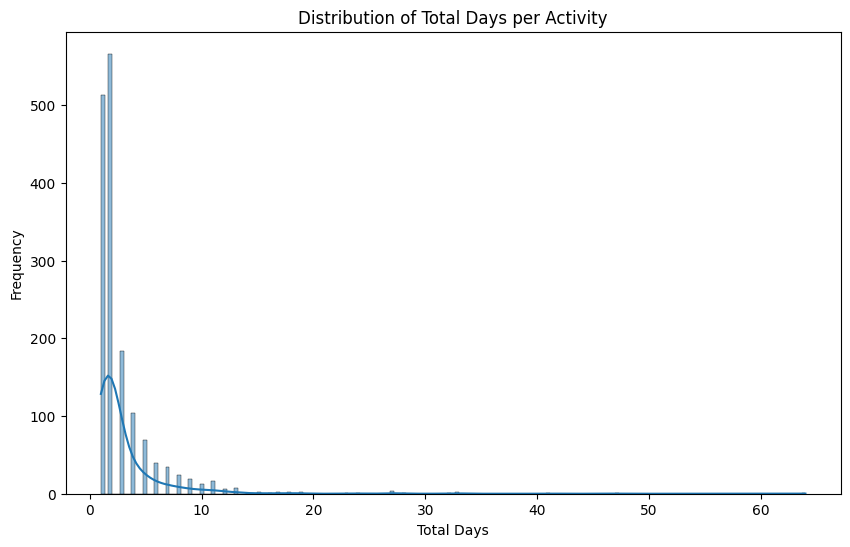

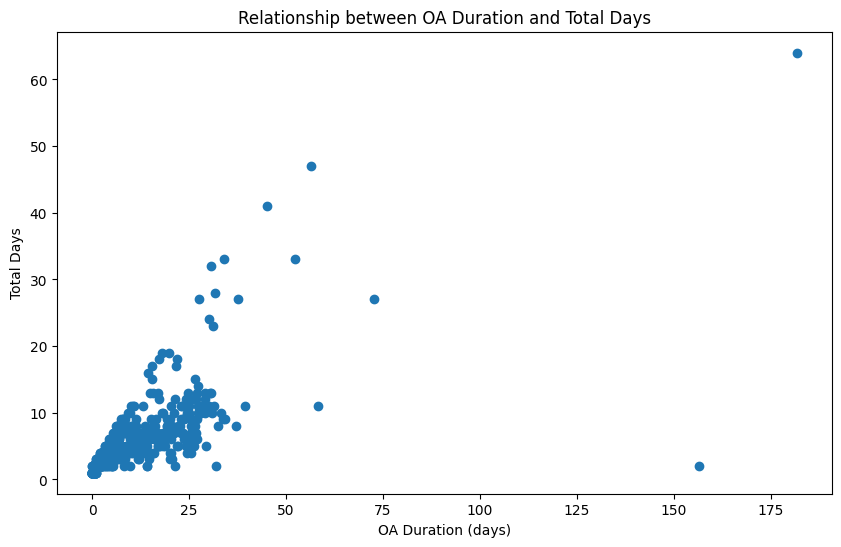

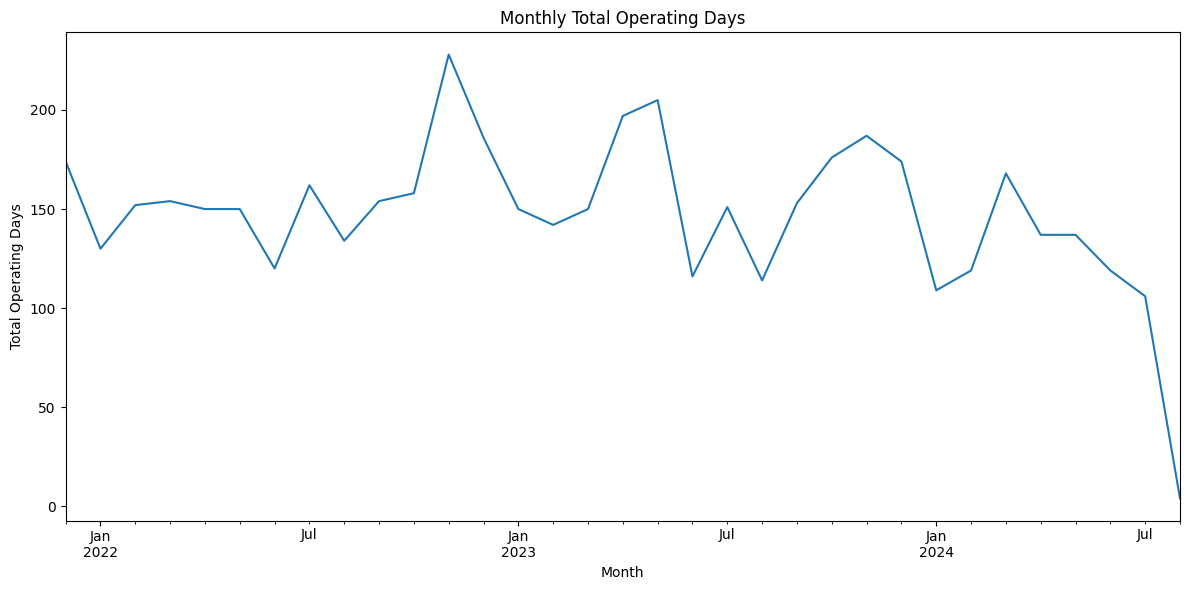


Value Statistics by Geounit:
             mean  median  min  max
Geounit                            
QTG      4.612121     2.0    1   47
NAO      3.675532     3.0    1   16
APG      2.890838     2.0    1   64
ECP      2.564409     2.0    1   27


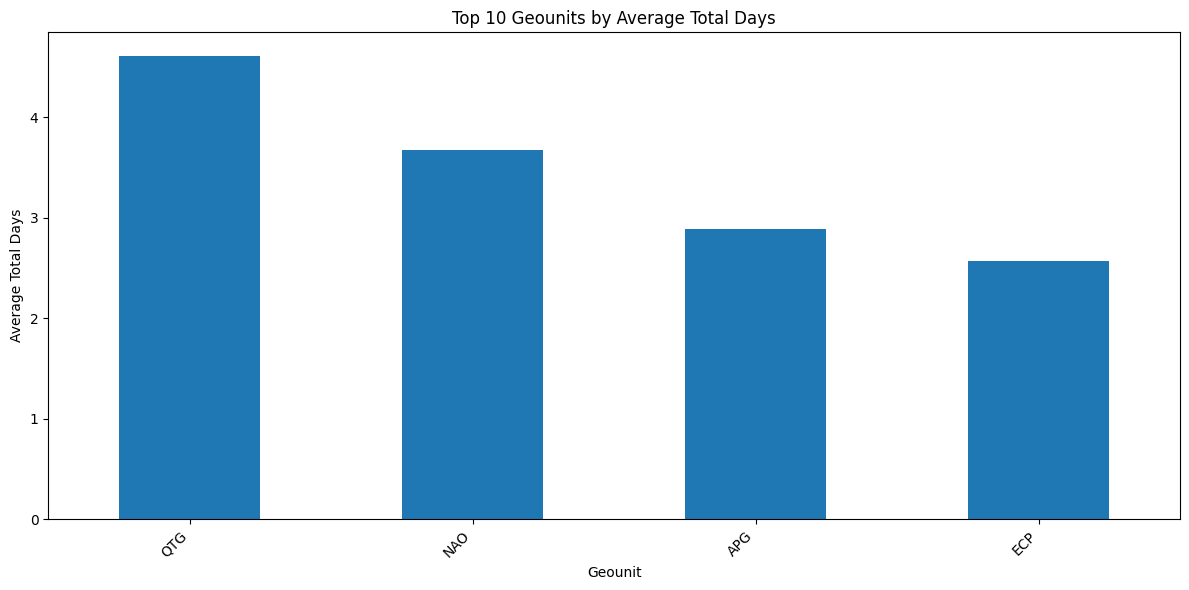


Top 10 Activities by Total Days:
     Geounit      Activity ID            OA Start              OA End  Value  \
1250     APG  A.1032910.01.01 2022-11-28 22:15:00 2023-05-29 13:00:00     64   
39       QTG  A.1001065.04.04 2023-09-05 10:10:00 2023-10-31 17:30:00     47   
1177     QTG  A.1029642.01.06 2022-09-23 13:50:00 2022-11-07 15:45:00     41   
1167     QTG  A.1029609.01.06 2024-03-18 14:00:00 2024-04-21 11:35:00     33   
1303     QTG  A.1035557.04.03 2023-11-09 19:00:00 2024-01-01 00:30:00     33   
3        QTG  A.1000132.17.06 2022-12-29 17:50:00 2023-01-29 10:45:00     32   
1384     QTG  A.1036763.02.02 2023-11-27 04:20:00 2023-12-28 17:30:00     28   
38       QTG  A.1001065.04.03 2023-05-26 08:20:00 2023-07-02 20:00:00     27   
781      ECP  A.1014562.03.01 2022-05-18 14:30:00 2022-07-30 07:02:00     27   
1305     QTG  A.1035557.04.05 2024-02-07 13:00:00 2024-03-06 02:25:00     27   

      OA Duration  
1250   181.614583  
39      56.305556  
1177    45.079861  
1167 

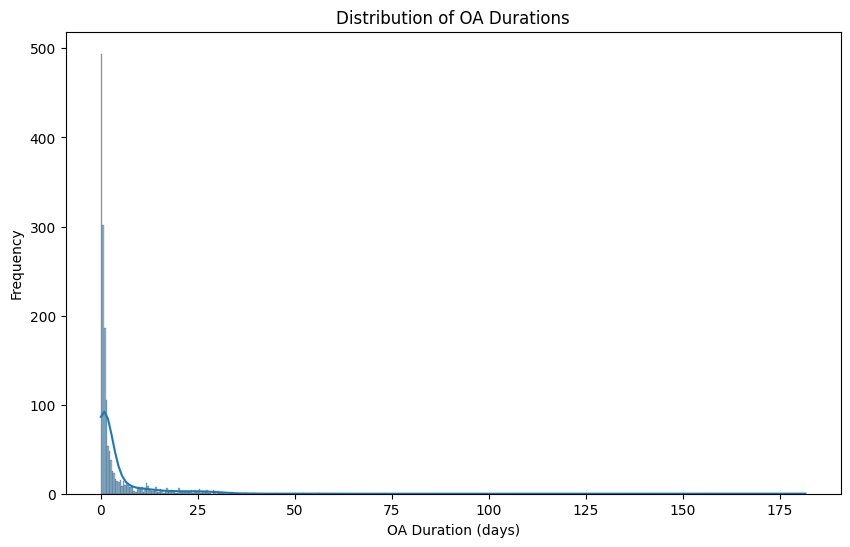


Correlation between Value and OA Duration:
0.7735699718570684

Percentage of activities where Value exceeds OA Duration:
81.22297714638665

Total number of unique Activity IDs: 1619


In [1]:
# 05_explore_journal_operatingtime.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.journal_data_preprocessing import preprocess_journal_data

# Load the data
print("Loading data...")
df = pd.read_csv('../raw_data/global_journal_operatingtime.csv')

# Display basic information about the dataset
print("Original Dataset Info:")
print(df.info())

# Apply the preprocessing function
print("Applying preprocessing function...")
processed_df = preprocess_journal_data(df)

print("\nProcessed Dataset Info:")
print(processed_df.info())

# Display the first few rows of the processed dataset
print("\nFirst few rows of the Processed Data:")
print(processed_df.head())

# Basic statistics of the processed data
print("\nSummary Statistics:")
print(processed_df.describe())

# Check for any missing values
print("\nMissing Values:")
print(processed_df.isnull().sum())

# Visualize the distribution of 'Value' (total days)
plt.figure(figsize=(10, 6))
sns.histplot(processed_df['Value'], kde=True)
plt.title('Distribution of Total Days per Activity')
plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between 'OA End' - 'OA Start' and 'Value'
processed_df['OA Duration'] = (processed_df['OA End'] - processed_df['OA Start']).dt.total_seconds() / (24 * 3600)  # Convert to days
plt.figure(figsize=(10, 6))
plt.scatter(processed_df['OA Duration'], processed_df['Value'])
plt.title('Relationship between OA Duration and Total Days')
plt.xlabel('OA Duration (days)')
plt.ylabel('Total Days')
plt.show()

# Time series analysis of operating time
monthly_operating_days = processed_df.groupby(processed_df['OA Start'].dt.to_period('M'))['Value'].sum()
plt.figure(figsize=(12, 6))
monthly_operating_days.plot()
plt.title('Monthly Total Operating Days')
plt.xlabel('Month')
plt.ylabel('Total Operating Days')
plt.tight_layout()
plt.show()

# Analyze distribution by Geounit
geounit_stats = processed_df.groupby('Geounit')['Value'].agg(['mean', 'median', 'min', 'max']).sort_values('mean', ascending=False)
print("\nValue Statistics by Geounit:")
print(geounit_stats)

# Visualize top Geounits by average Value
top_geounits = geounit_stats.head(10)
plt.figure(figsize=(12, 6))
top_geounits['mean'].plot(kind='bar')
plt.title('Top 10 Geounits by Average Total Days')
plt.xlabel('Geounit')
plt.ylabel('Average Total Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional analyses
print("\nTop 10 Activities by Total Days:")
print(processed_df.nlargest(10, 'Value'))

print("\nBottom 10 Activities by Total Days:")
print(processed_df.nsmallest(10, 'Value'))

# Analyze the distribution of OA durations
plt.figure(figsize=(10, 6))
sns.histplot(processed_df['OA Duration'], kde=True)
plt.title('Distribution of OA Durations')
plt.xlabel('OA Duration (days)')
plt.ylabel('Frequency')
plt.show()

# Calculate and display some statistics about the Value and OA Duration
print("\nCorrelation between Value and OA Duration:")
print(processed_df['Value'].corr(processed_df['OA Duration']))

print("\nPercentage of activities where Value exceeds OA Duration:")
print((processed_df['Value'] > processed_df['OA Duration']).mean() * 100)

print(f"\nTotal number of unique Activity IDs: {len(processed_df)}")

# Additional analyses can be added here based on specific requirements and insights gained from the exploration